In [1]:
# Importing important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing data
df = pd.read_csv("/content/Restaurant_Reviews.tsv")

In [3]:
df.head()

,Review\tLiked
0,Wow... Loved this place.\t1
1,Crust is not good.\t0
2,Not tasty and the texture was just nasty.\t0
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...


In [5]:
df.shape

(1000, 1)

The data requires some preprocessing

In [6]:

df['Review'] = df['Review\tLiked'].apply(lambda x: x.split("\t")[0])
df["Liked"] =df['Review\tLiked'].apply(lambda x: x.split("\t")[1])
df.drop("Review\tLiked",axis=1,inplace=True)


In [7]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


hence there are no missing data in the df

In [9]:
df1 = df['Liked'].astype(int)
positive_count = np.sum(df1)
negative_count = len(df['Liked']) - positive_count
print(positive_count)

500


In [10]:
print(negative_count)

500


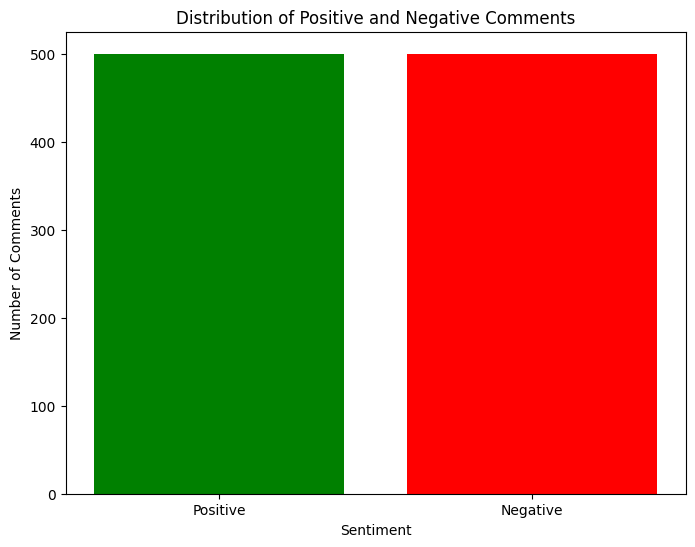

In [11]:
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Distribution of Positive and Negative Comments')
plt.show()

data preprocessing :

In [12]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
corpus = []
for i in range(0,1000):
      review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(df['Review'][i]))
      review = review.lower()
      review_words = review.split()
      review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
      ps = PorterStemmer()
      review = [ps.stem(word) for word in review_words]
      review = ' '.join(review)
      corpus.append(review)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)  #max_features = 1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

Preparing data for training and testing

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [26]:
# Predictions on test data
y_pred = classifier.predict(X_test)

In [27]:
# Evaluation of predictions using accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_pred)
print("Accuracy score is : {}%".format(round(score1*100,2)))

Accuracy score is : 75.5%


In [28]:
# Confusion MAtrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[70, 27],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

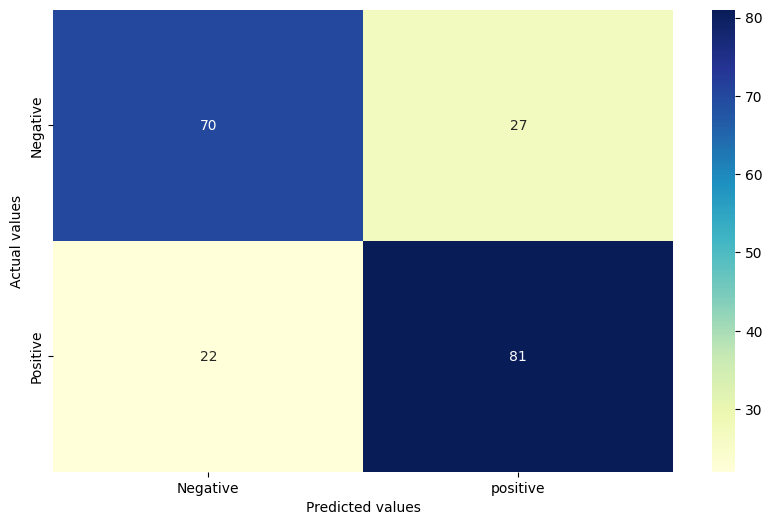

In [29]:
# Plottting COnfusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

we have got baseline predictions here lets check if the model performance improves by doing some hyper parameter tuning

In [30]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha = {} is : {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("-------------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))

Accuracy score for alpha = 0.1 is : 77.5%
Accuracy score for alpha = 0.2 is : 78.0%
Accuracy score for alpha = 0.3 is : 77.5%
Accuracy score for alpha = 0.4 is : 77.5%
Accuracy score for alpha = 0.5 is : 76.5%
Accuracy score for alpha = 0.6 is : 76.5%
Accuracy score for alpha = 0.7 is : 76.5%
Accuracy score for alpha = 0.8 is : 75.5%
Accuracy score for alpha = 0.9 is : 75.5%
Accuracy score for alpha = 1.0 is : 75.5%
-------------------------------------------
The best accuracy is 78.0% with alpha value as 0.2


In [31]:
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

Classification of Reviews

In [32]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review =sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [33]:
sample_review = 'The food is very very good'
array = predict_sentiment(sample_review)
mapping = {'0': 'this is negative review', '1': 'this is positive review'}
reviews = [mapping[val] for val in array]
print(reviews)

['this is positive review']


In [34]:
sample_review = 'The food is very very bad'
array = predict_sentiment(sample_review)
mapping = {'0': 'this is negative review', '1': 'this is positive review'}
reviews = [mapping[val] for val in array]
print(reviews)

['this is negative review']


In [35]:
sample_review = 'best food'
array = predict_sentiment(sample_review)
mapping = {'0': 'this is negative review', '1': 'this is positive review'}
reviews = [mapping[val] for val in array]
print(reviews)

['this is positive review']


So this model is perfoming fairly good!